In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Sử dụng ngôn ngữ R
 - 1.1 Lấy dữ liệu chứng khoán (link kaggle)
 - 1.2 Phân tích dữ liệu trong 10 năm của 1 mã chứng khoán nào đó (bạn tự chọn)
 - 1.3 Trực quan hóa dữ liệu theo năm trong 10 năm

In [ ]:
install.packages(c("quantmod", "forecast", "ggplot2"))
library(quantmod)
library(forecast)
library(ggplot2)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("quantmod", "forecast", "ggplot2")):
“installation of package ‘quantmod’ had non-zero exit status”
Warning message in install.packages(c("quantmod", "forecast", "ggplot2")):
“installation of package ‘ggplot2’ had non-zero exit status”
Warning message in install.packages(c("quantmod", "forecast", "ggplot2")):
“installation of package ‘forecast’ had non-zero exit status”


In [ ]:
#Link Kaggle: "https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/input?select=HistoricalQuotes.csv"
data <- read.csv("/content/drive/MyDrive/BIG DATA/AAPL in 10 year.csv")

In [ ]:
# Hiển thị 6 dòng đầu dữ liệu
head(data)

,Date,Close.Last,Volume,Open,High,Low
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
2,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
3,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
4,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
5,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
6,02/21/2020,$313.05,32426420,$318.62,$320.45,$310.5


In [ ]:
# Hiển thị 6 dòng cuối dữ liệu
tail(data)

,Date,Close.Last,Volume,Open,High,Low
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
2513,03/08/2010,$31.2971,107326832,$31.43,$31.4414,$31.1786
2514,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2515,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2516,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2517,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771
2518,03/01/2010,$29.8557,137312041,$29.3928,$29.9286,$29.35


In [ ]:
#Loại bỏ dấu đồng tiền và chuyển string sang số
data$Close.Last <- as.numeric(gsub("[^0-9.]", "", data$Close))
data$Open <- as.numeric(gsub("[^0-9.]", "", data$Open))
data$High <- as.numeric(gsub("[^0-9.]", "", data$High))
data$Low <- as.numeric(gsub("[^0-9.]", "", data$Low))

# Hiển thị dữ liệu
head(data)

,Date,Close.Last,Volume,Open,High,Low
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,02/28/2020,273.36,106721200,257.26,278.41,256.37
2,02/27/2020,273.52,80151380,281.10,286.00,272.96
3,02/26/2020,292.65,49678430,286.53,297.88,286.50
4,02/25/2020,288.08,57668360,300.95,302.53,286.13
5,02/24/2020,298.18,55548830,297.26,304.18,289.23
6,02/21/2020,313.05,32426420,318.62,320.45,310.50


In [ ]:
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




In [ ]:
#Thực hiện thống kê mô tả
psych::describe(data)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Date,1,2518,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Close.Last,2,2518,1.147695e+02,6.066241e+01,101.090,1.084895e+02,5.901282e+01,2.983570e+01,327.20,2.973643e+02,0.9699172,0.6771404,1.208904e+00
Volume,3,2518,7.258009e+07,5.663113e+07,52954690.000,6.324150e+07,4.044396e+07,1.136205e+07,462442329.00,4.510803e+08,1.7194681,3.9100714,1.128567e+06
Open,4,2518,1.147284e+02,6.054689e+01,101.115,1.084874e+02,5.906678e+01,2.939280e+01,324.74,2.953472e+02,0.9644319,0.6596369,1.206602e+00
High,5,2518,1.157664e+02,6.113446e+01,102.085,1.094346e+02,5.923832e+01,2.992860e+01,327.85,2.979214e+02,0.9697137,0.6751356,1.218311e+00
Low,6,2518,1.136906e+02,6.008510e+01,100.350,1.075017e+02,5.884017e+01,2.846430e+01,323.35,2.948857e+02,0.9638769,0.6576010,1.197399e+00


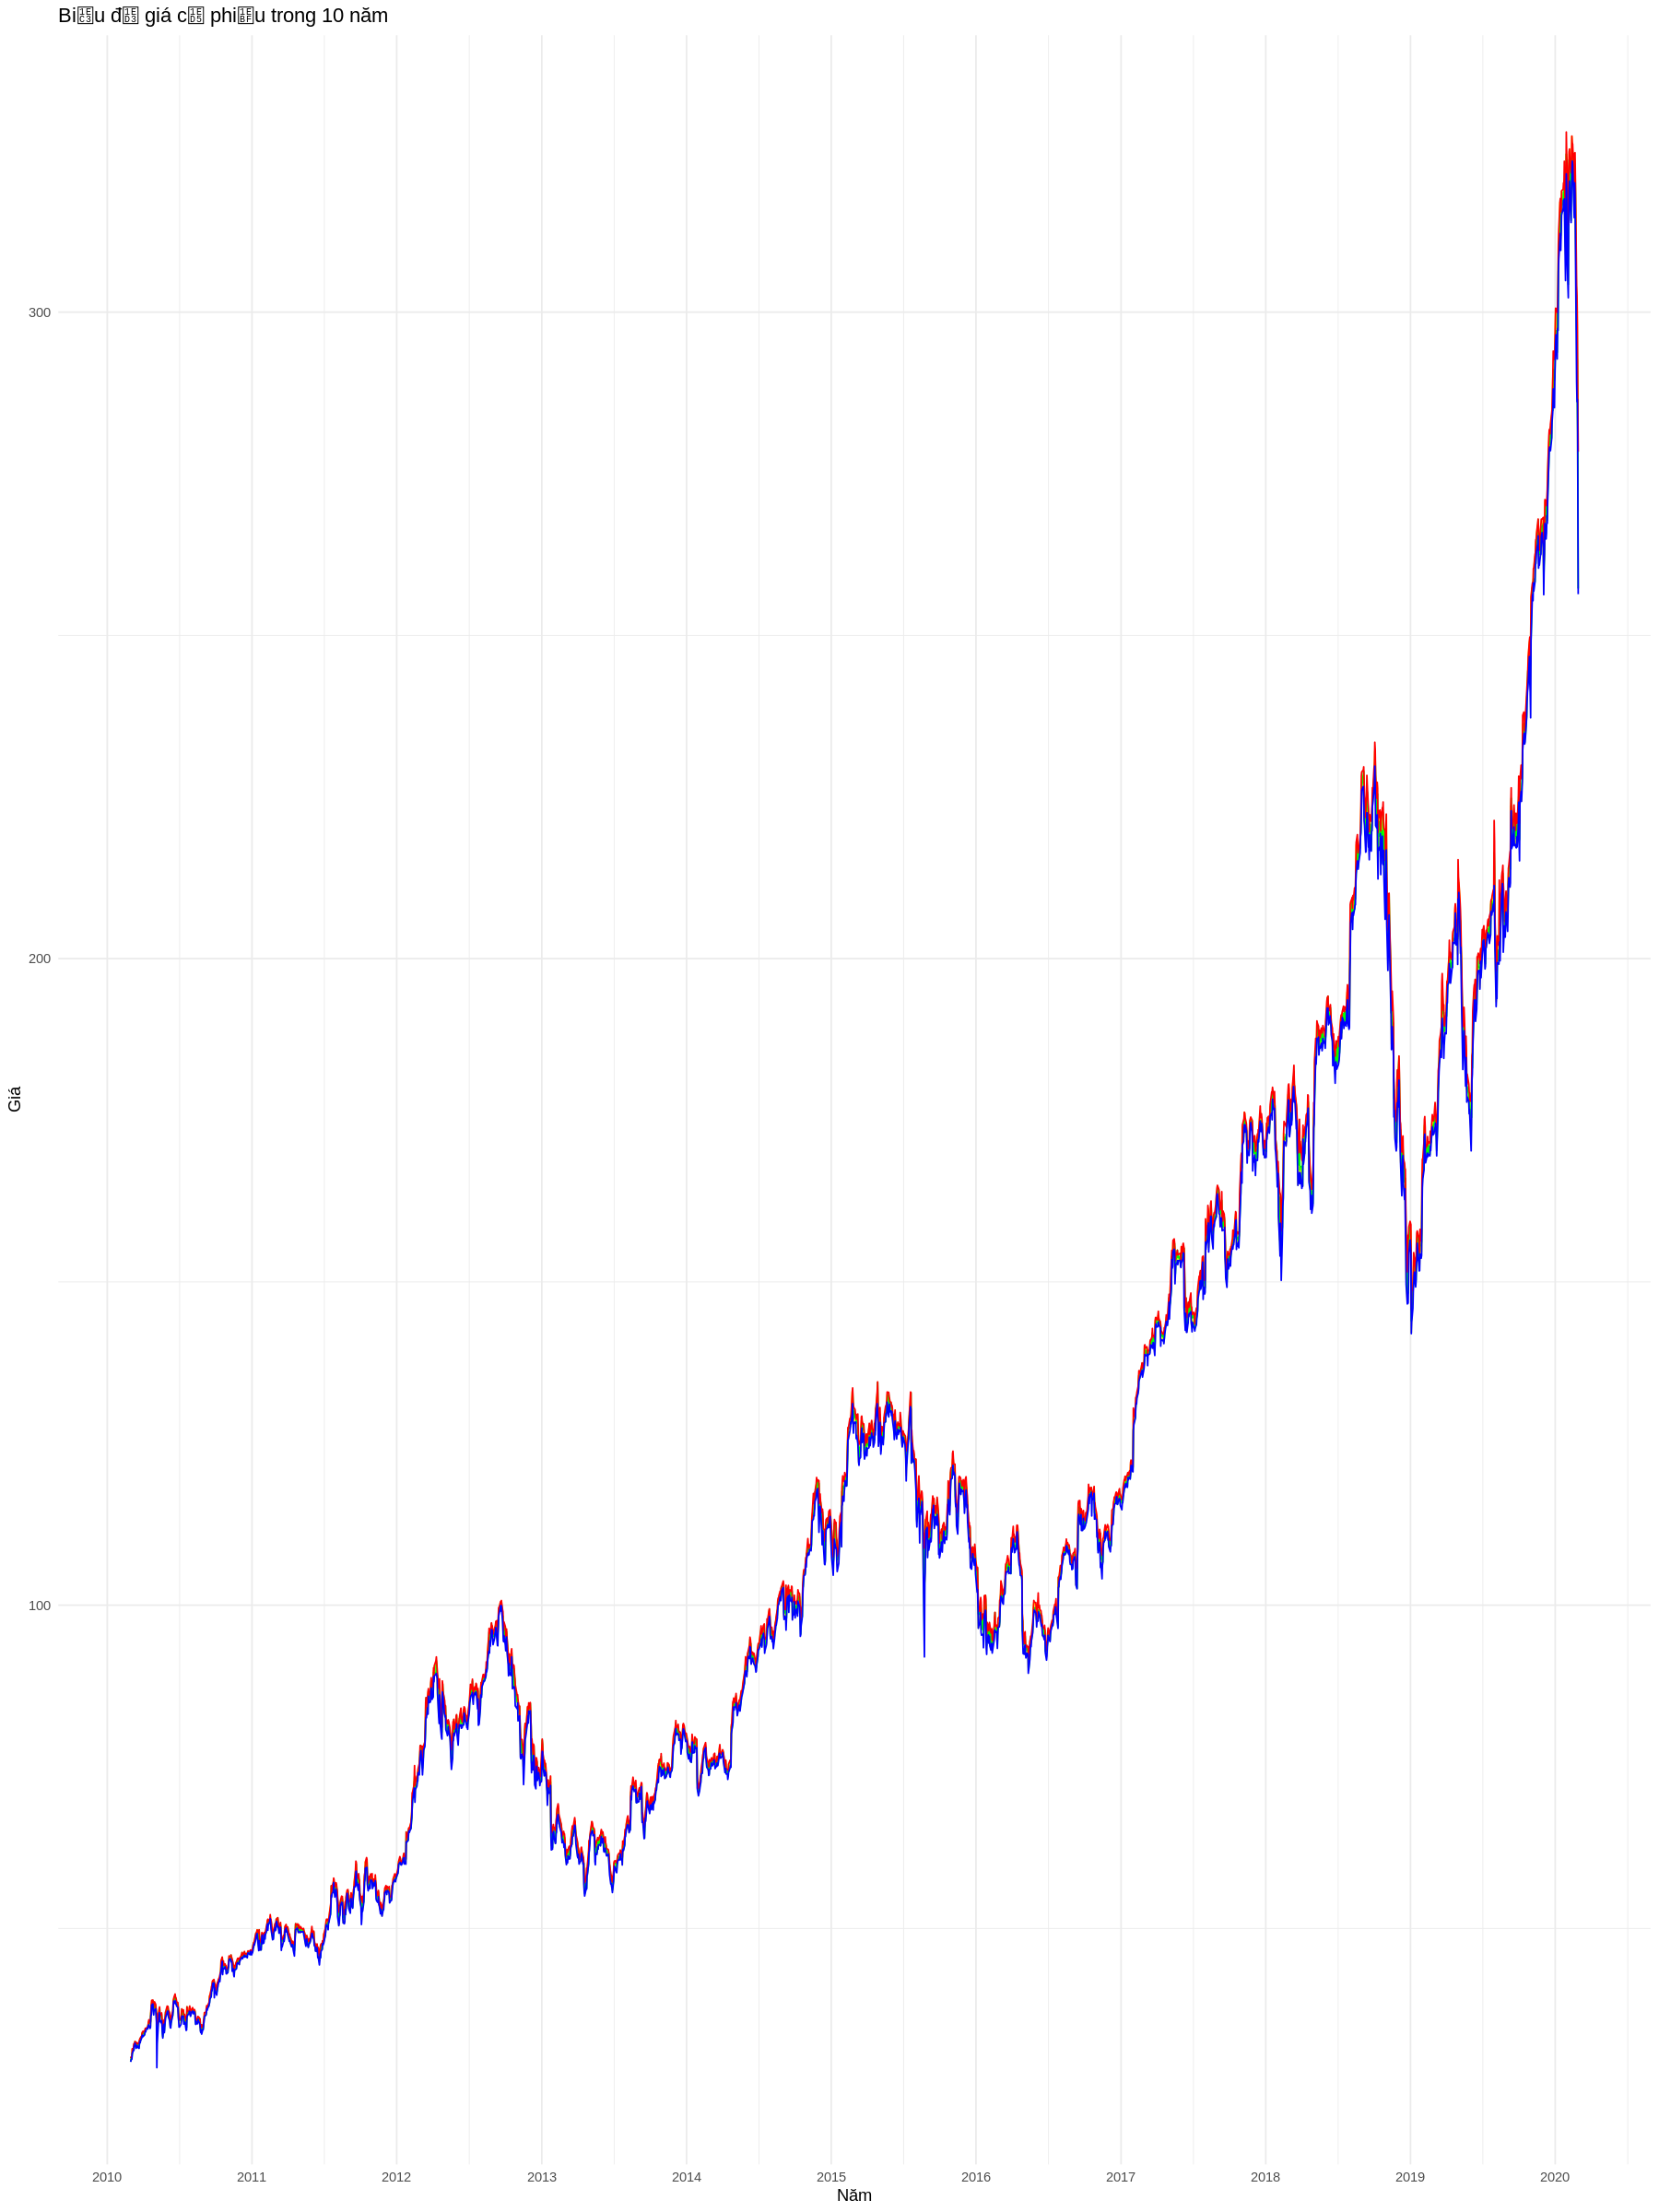

In [ ]:
# Chuyển cột Date thành kiểu dữ liệu ngày
data$Date <- as.Date(data$Date, format = "%m/%d/%Y")

# Phân tích dữ liệu trong 10 năm
start_date <- as.Date("2010-01-03")
end_date <- as.Date("2020-02-28")
data_10_years <- subset(data, Date >= start_date & Date <= end_date)

# Thiết lập kích thước của biểu đồ
options(repr.plot.width = 15, repr.plot.height = 20)

# Vẽ biểu đồ
library(ggplot2)
ggplot(data, aes(x = Date)) +
  geom_line(aes(y = Close.Last), color = "yellow", linetype = "solid") +
  geom_line(aes(y = Open), color = "green", linetype = "solid") +
  geom_line(aes(y = High), color = "red", linetype = "solid") +
  geom_line(aes(y = Low), color = "blue", linetype = "solid") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  labs(title = "Biểu đồ giá cổ phiếu trong 10 năm",
       x = "Năm",
       y = "Giá") +
  theme_minimal()


In [ ]:
# Cài đặt và load gói lubridate
install.packages("lubridate")
library(lubridate)

# Tạo một cột cho mùa vụ
data$Season <- factor(month(data$Date), levels = 1:12, labels = c("Winter", "Winter", "Spring", "Spring", "Spring", "Summer", "Summer", "Summer", "Autumn", "Autumn", "Autumn", "Winter"))

# Tóm tắt dữ liệu theo mùa vụ
summary_by_season <- aggregate(data$Close.Last, by = list(Season = data$Season), FUN = mean)

# Hiển thị kết quả
print(summary_by_season)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




  Season        x
1 Winter 123.2140
2 Spring 105.1920
3 Summer 110.8069
4 Autumn 120.4468


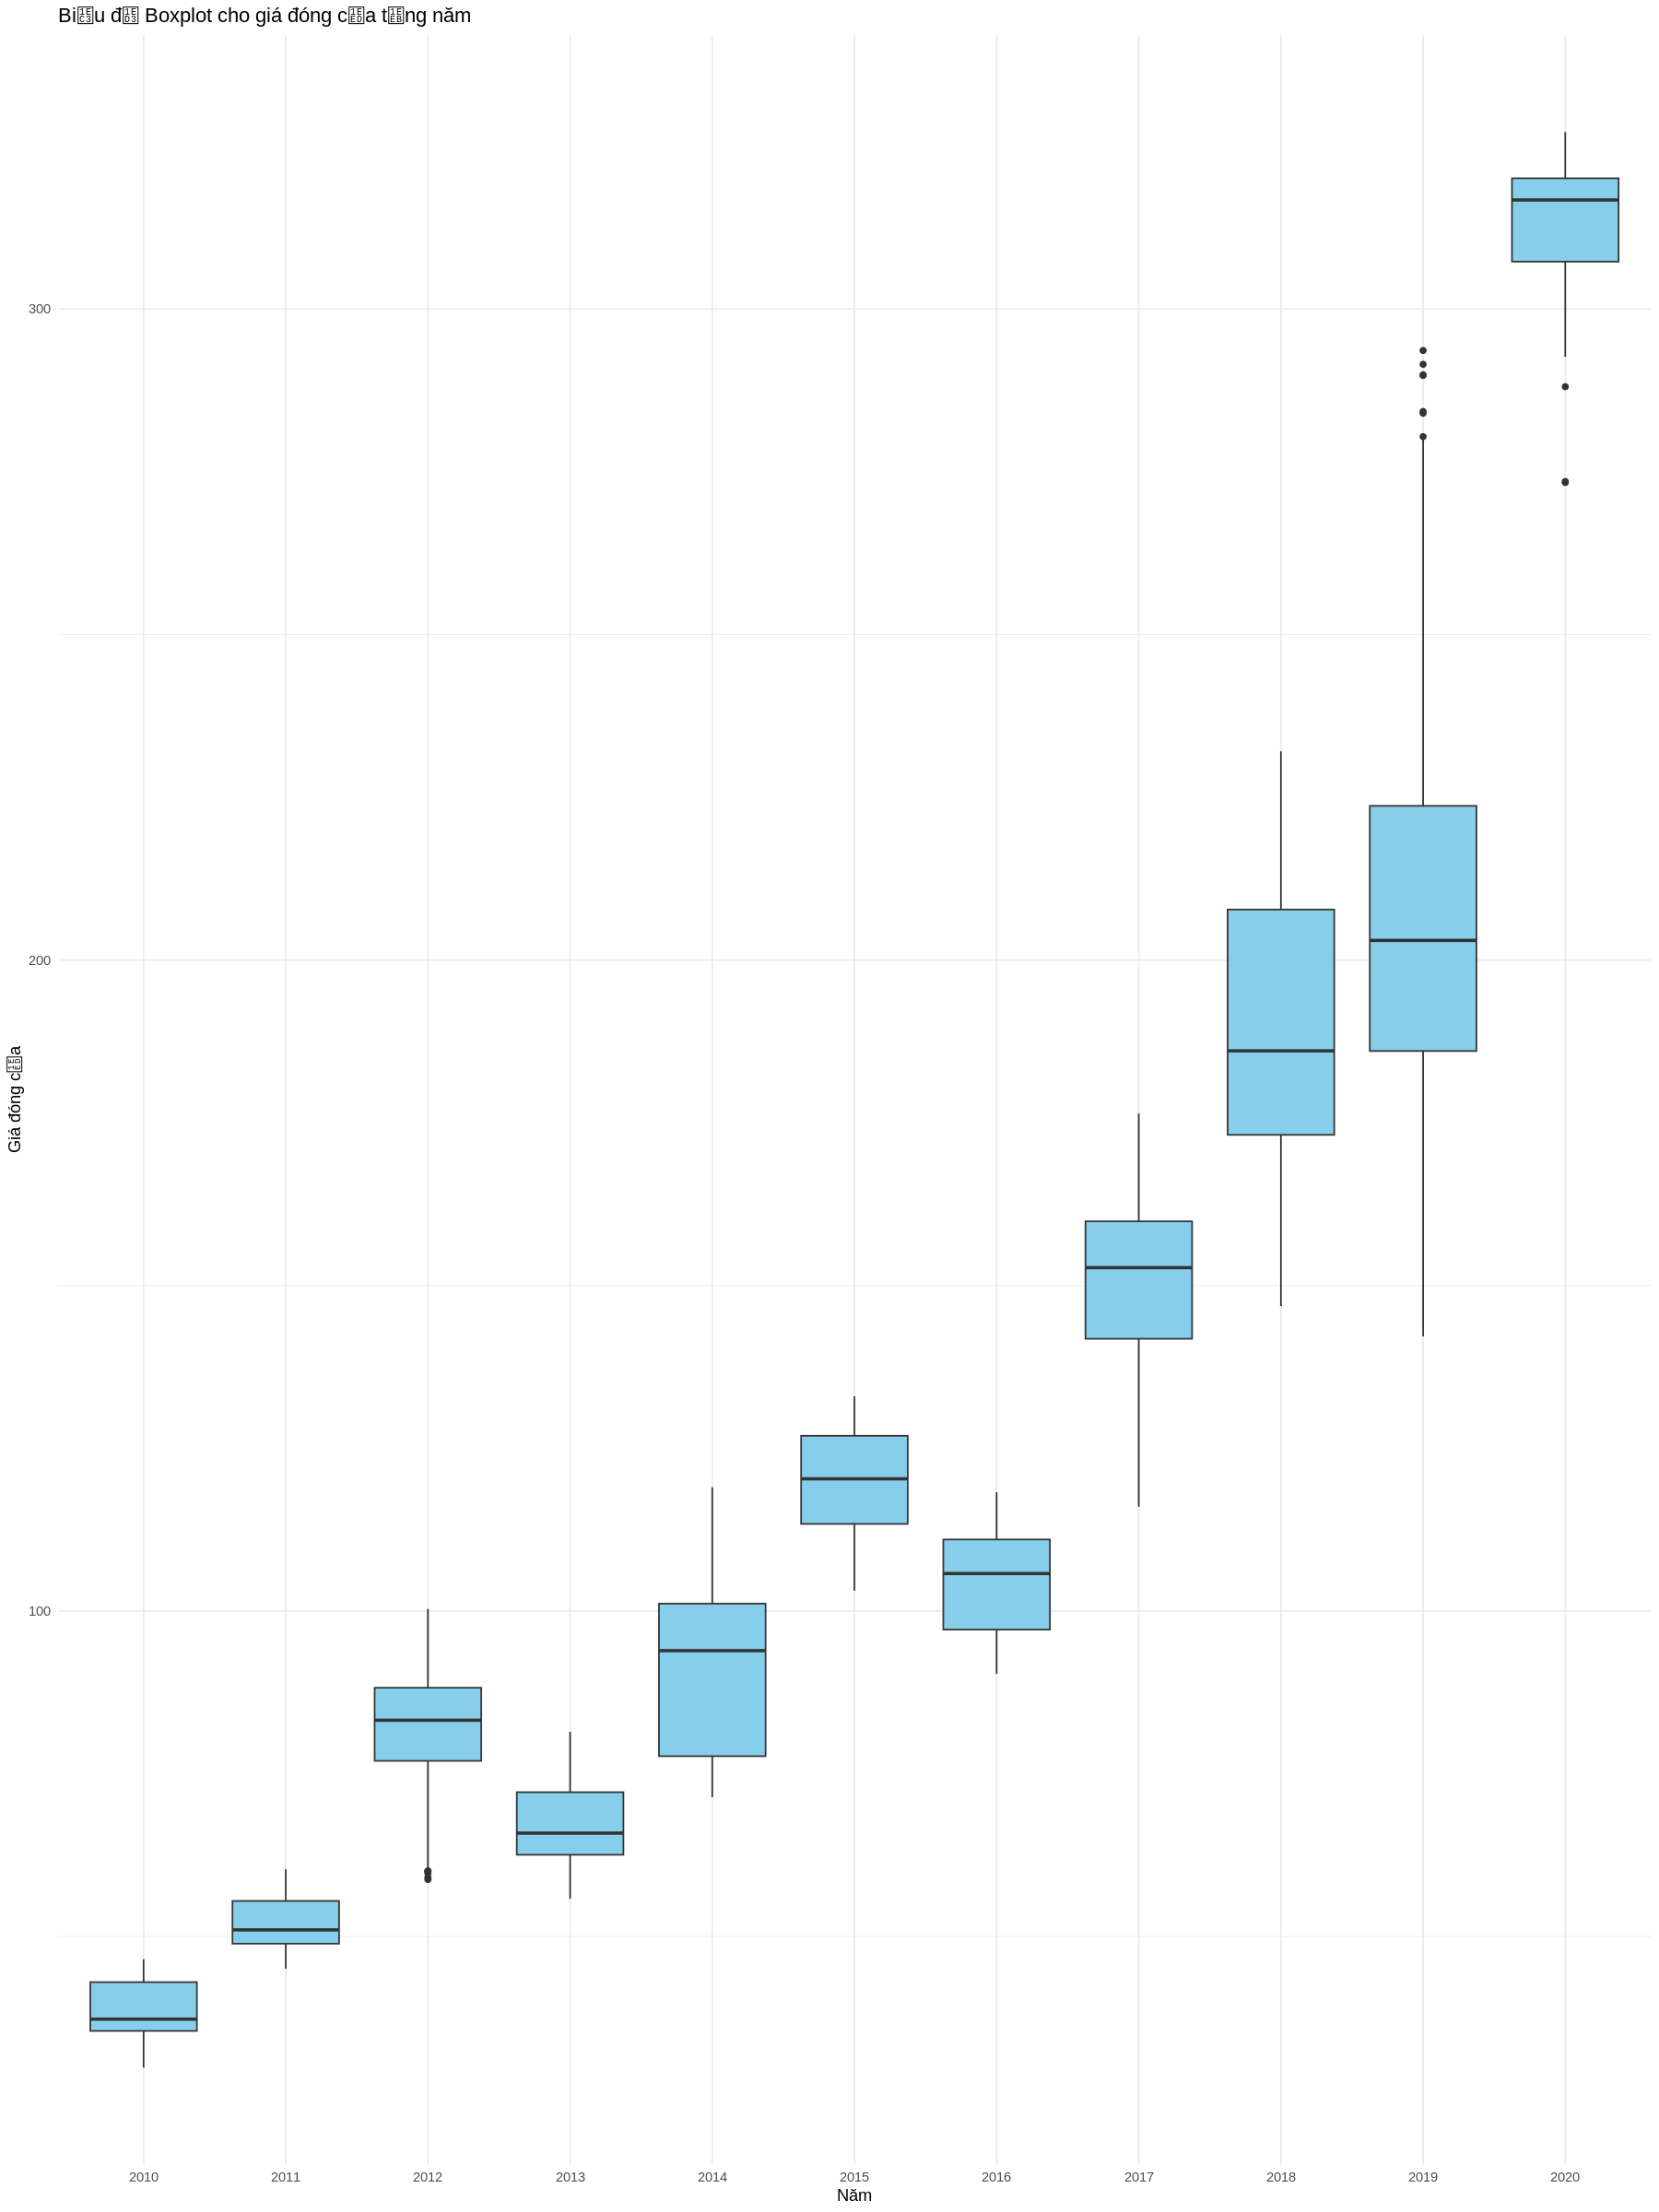

In [ ]:
# Tạo một cột cho năm
data$Year <- year(data$Date)

# Vẽ biểu đồ boxplot cho giá đóng cửa từng năm
boxplot_by_year <- ggplot(data, aes(x = as.factor(Year), y = Close.Last)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Biểu đồ Boxplot cho giá đóng cửa từng năm",
       x = "Năm",
       y = "Giá đóng cửa") +
  theme_minimal()

# Hiển thị biểu đồ boxplot
print(boxplot_by_year)

In [ ]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



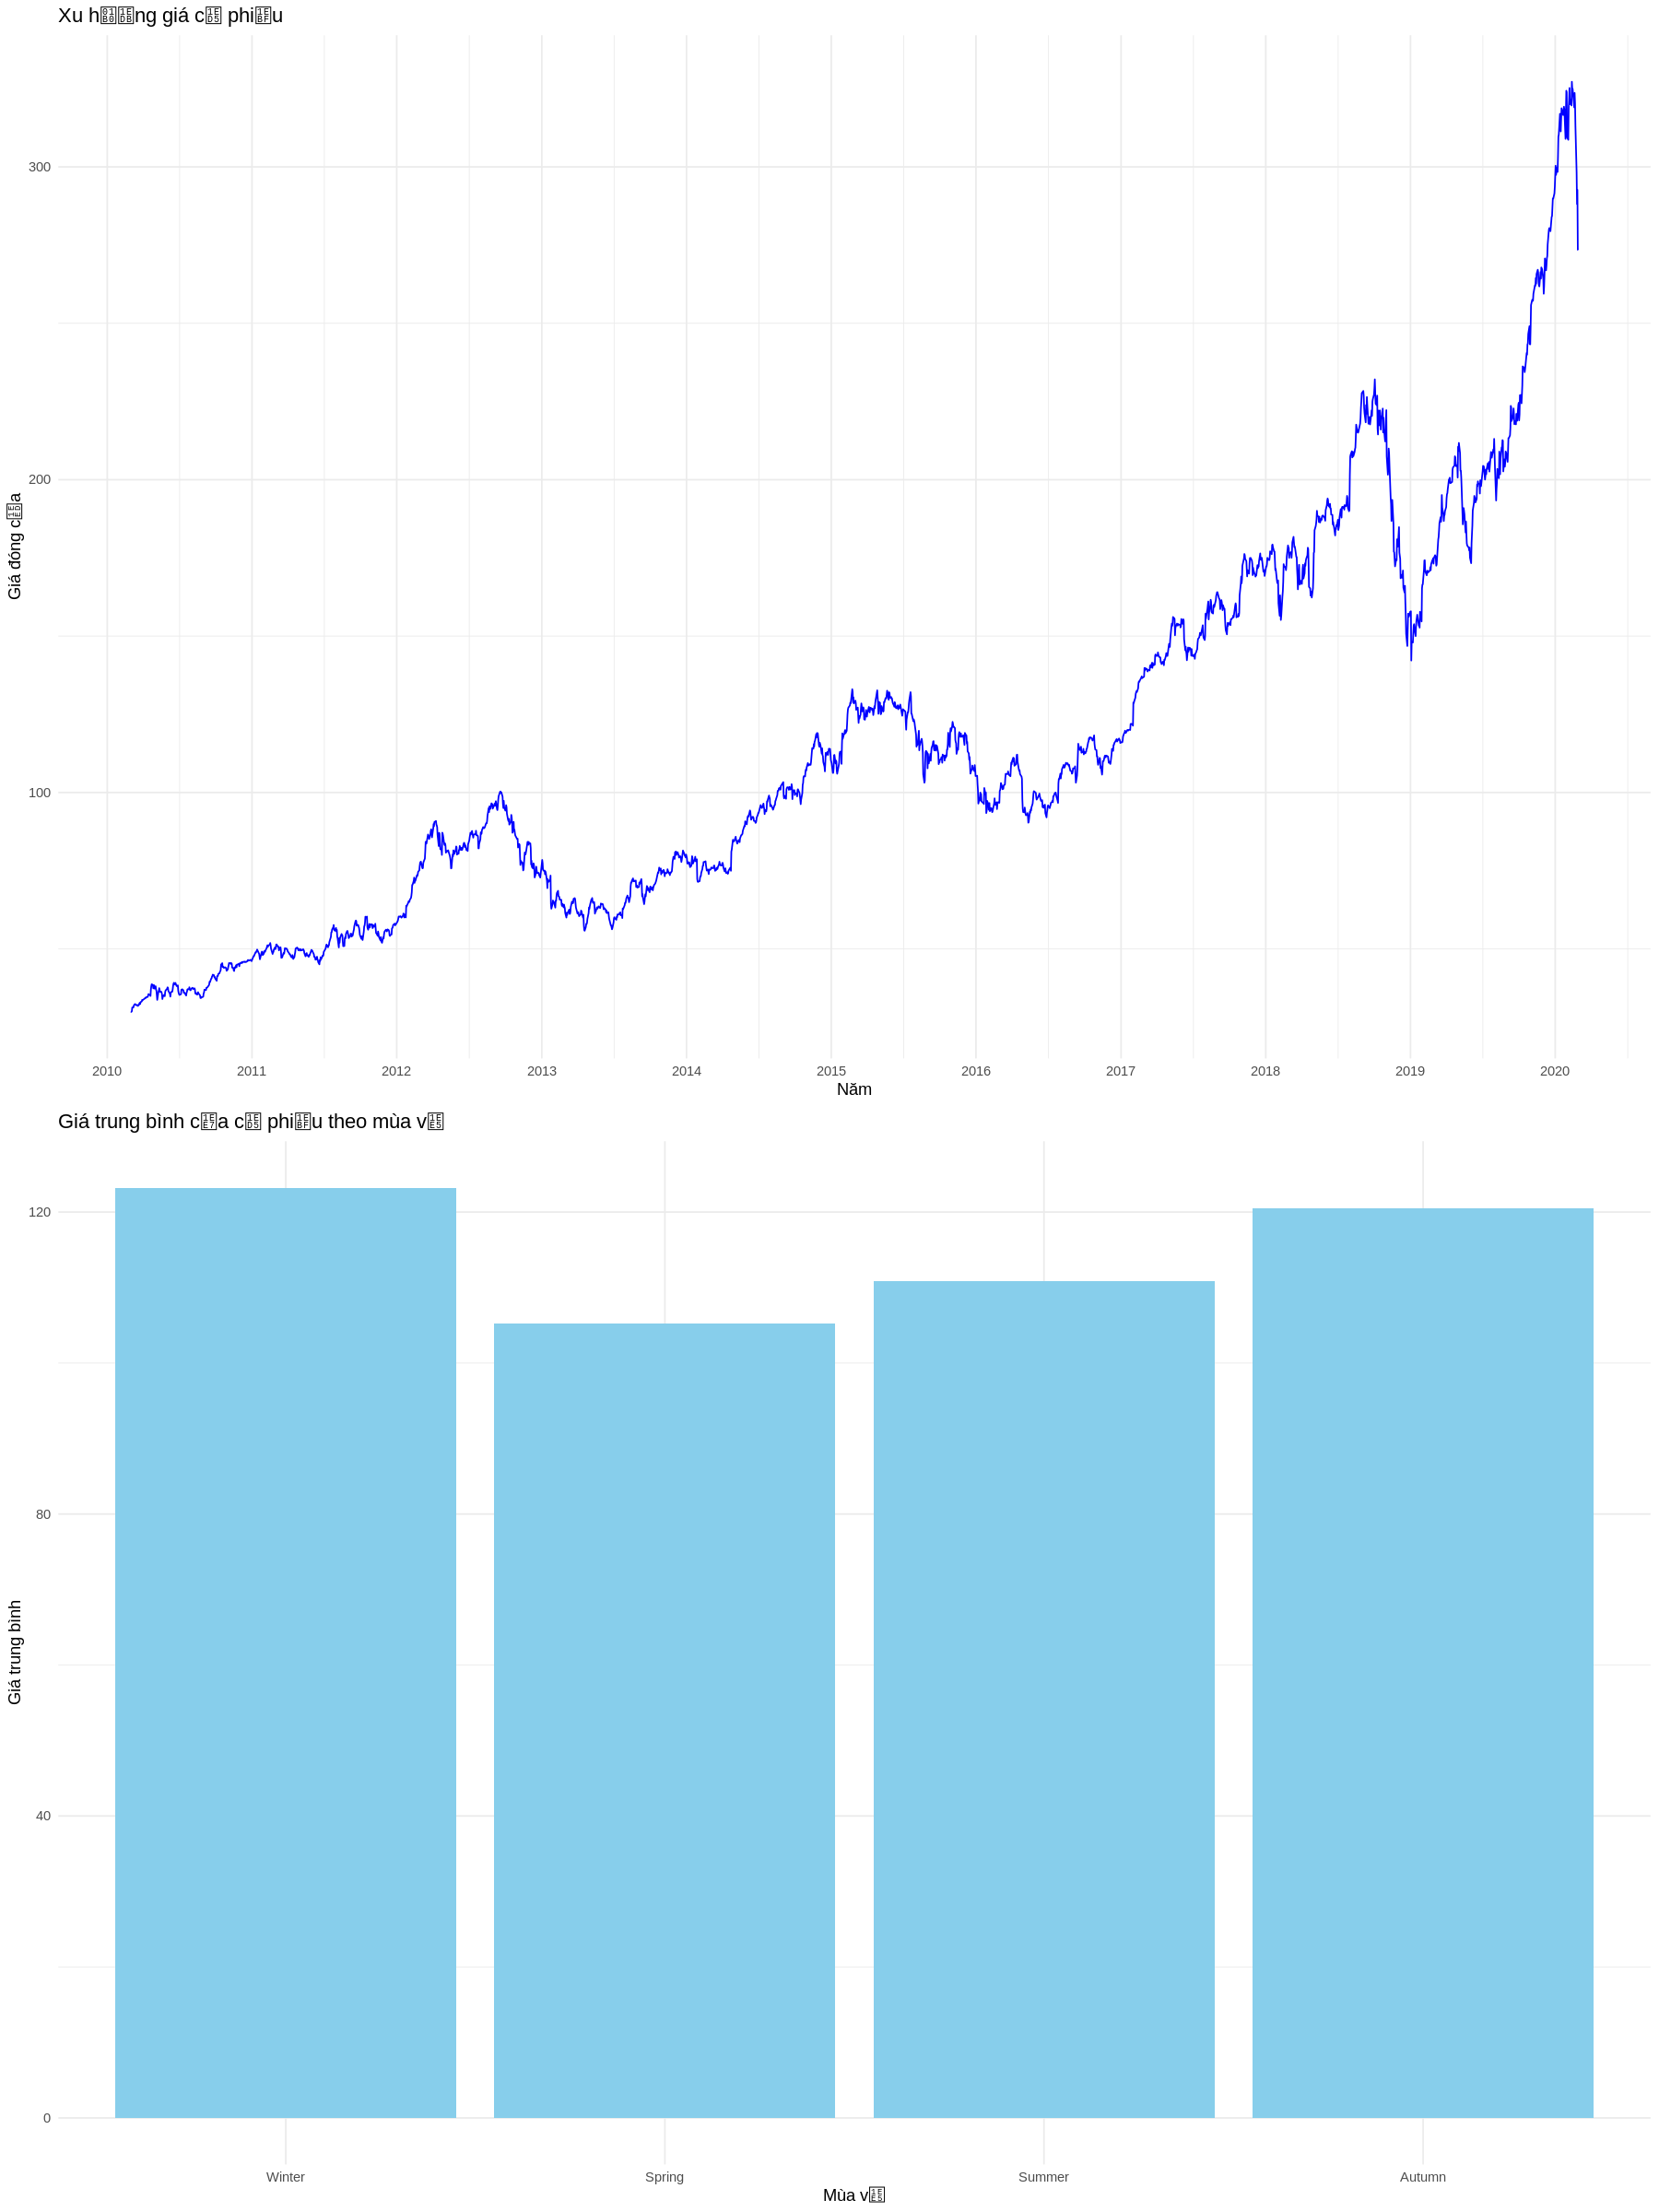

In [ ]:
# Tạo biểu đồ dòng cho xu hướng giá cổ phiếu theo thời gian
trend_plot <- ggplot(data, aes(x = Date)) +
  geom_line(aes(y = Close.Last), color = "blue") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  labs(title = "Xu hướng giá cổ phiếu",
       x = "Năm",
       y = "Giá đóng cửa") +
  theme_minimal()

# Tạo biểu đồ cột cho giá trung bình của cổ phiếu giữa các mùa vụ
season_plot <- ggplot(summary_by_season, aes(x = Season, y = x)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Giá trung bình của cổ phiếu theo mùa vụ",
       x = "Mùa vụ",
       y = "Giá trung bình") +
  theme_minimal()

# Hiển thị cả hai biểu đồ
gridExtra::grid.arrange(trend_plot, season_plot, nrow = 2)

## Tập dữ liệu này là dữ liệu giá cổ phiếu biến động trong 10 năm (2010-2020) của Apple (mã Apple)
 - 1. Qua việc trực quan bằng ngôn ngữ R, ta thấy được giá cổ phiếu của Apple có xu hường tăng trong vòng 10 năm từ 2010 đến 2020
 - 2. Qua phân tích xu hướng mùa vụ ta thấy được giá cổ phiếu thường tăng mạnh vào những dịp cuối năm như đặc biệt là mùa đông